# Analysis

**Hypothesis**: In severe COVID-19, dendritic cells exhibit a disruption in the coordination between antigen presentation and interferon signaling. Specifically, we hypothesize that the normally positive correlation between HLA1 and IFN1 observed in dendritic cells becomes altered in COVID-19 patients compared to healthy controls, potentially impairing T cell priming and antiviral responses.

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Set up visualization defaults for better plots
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figsize = (8, 8)
sc.settings.dpi = 100
sc.settings.facecolor = 'white'
warnings.filterwarnings('ignore')

# Set Matplotlib and Seaborn styles for better visualization
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['savefig.dpi'] = 150
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)

# Load data
print("Loading data...")
adata = sc.read_h5ad("/scratch/users/salber/Single_cell_atlas_of_peripheral_immune_response_to_SARS_CoV_2_infection.h5ad")
print(f"Data loaded: {adata.shape[0]} cells and {adata.shape[1]} genes")


# Analysis Plan

**Hypothesis**: In severe COVID-19, dendritic cells exhibit a disruption in the coordination between antigen presentation and interferon signaling. Specifically, we hypothesize that the normally positive correlation between HLA1 and IFN1 observed in dendritic cells becomes altered in COVID-19 patients compared to healthy controls, potentially impairing T cell priming and antiviral responses.

## Steps:
- Subset dendritic cells from the full dataset using the 'cell_type_coarse' column to isolate cells labeled as 'DC' and perform initial quality control by examining key metrics (e.g., nFeature_RNA and percent_mt) to ensure data robustness.
- Divide the quality-controlled dendritic cell subset into groups based on disease status ('COVID' vs 'Healthy') using the 'Status' column.
- Calculate the Pearson correlation coefficient between HLA1 and IFN1 expression values for dendritic cells in each group using statistical methods (scipy.stats.pearsonr).
- Perform a Fisher’s z-transformation to statistically assess whether the difference between the two correlation coefficients (from COVID and Healthy groups) is significant.
- Visualize the relationships by generating scatter plots with fitted regression lines in a grid layout to compare the coupling between antigen presentation and interferon signaling across the groups.


## This code creates a copy of the dendritic cell subset to avoid accidental modifications to the original anndata object and checks that the subset is non-empty. It also prints out QC-related columns (nFeature_RNA and percent_mt) from the metadata, laying the groundwork for further quality assessment.

In [2]:
dc_adata = adata[adata.obs['cell_type_coarse'] == 'DC']
print('Dendritic cell subset shape:', dc_adata.shape)
print(dc_adata.obs[['cell_type_coarse', 'Status']].head())

Dendritic cell subset shape: (456, 26361)
                 cell_type_coarse Status
covid_555_1.1879               DC  COVID
covid_555_1.2028               DC  COVID
covid_555_1.2468               DC  COVID
covid_555_1.2566               DC  COVID
covid_555_1.2714               DC  COVID


### Agent Interpretation

The analysis thus far focuses on dendritic cells (DCs) in the context of severe COVID-19, which is an interesting choice as DCs play a crucial role in antigen presentation and initiating immune responses. The hypothesis is centered around altered cell-cell communication in severe COVID-19, particularly involving monocytes and T cells. However, the current step seems to focus primarily on dendritic cells, which may affect how directly it informs the stated hypothesis.

Here are some points and recommendations for future steps:

1. **Validation of Selection**: Ensure that focusing on dendritic cells (DCs) aligns with the overall hypothesis about monocyte and T-cell communication. If DCs are pivotal in the communication network, investigating their role might indeed be valuable. Consider how DCs participate in this potential signaling pathway and how they might contribute to immunopathology.

2. **Characterize DC Subsets**: Delve deeper into the identified DC subset to determine specific characteristics or markers that differentiate them from other immune cells, especially in a COVID-19 context. Conduct differential expression analysis on the DC subset to identify upregulated or downregulated genes. This could provide insights into the specific immune roles or dysfunction of these cells during severe COVID-19.

3. **Comparison with Controls**: Currently, the focus is on COVID-19 samples. A direct comparison with dendritic cells from healthy controls is essential to identify specific transcriptomic changes that occur in COVID-19. This would aid in identifying markers or pathways specifically dysregulated in the disease state.

4. **Integration with Other Cell Types**: Incorporate findings from the DC analysis with parallel analyses of monocytes and T cells. If the goal is to uncover communication networks, consider using receptor-ligand interaction analysis tools to link changes in DCs to alterations in monocytes or T cells, which might directly inform the hypothesis.

5. **Pathway and Interaction Analysis**: Utilize pathway enrichment analyses or tools like CellPhoneDB to explore cytokine-receptor interactions and any upregulated pathways in DCs. Determine if these interactions suggest a potential role for DCs in modulating T cell and monocyte activity, potentially contributing to the cytokine storm in severe COVID-19.

6. **Explore Novel Populations**: Investigate if there are any emerging or altered dendritic cell populations in the context of COVID-19, similar to the developing neutrophil populations discussed in the research paper. Transcriptomic dynamics in these novel populations could offer further insights.

By implementing these strategies, you can better assess the relevancy of dendritic cells to the hypothesis and potentially identify novel interactions or regulatory mechanisms that contribute to the pathogenesis of severe COVID-19. This approach can offer a comprehensive view of immune dysregulation and help validate or refine the initial hypothesis.

## This code performs differential expression analysis on the dendritic cell subset using scanpy's rank_genes_groups function, then extracts and prints the top 10 genes along with their log-fold changes and p-values. Finally, it visualizes the top differentially expressed genes using an enhanced heatmap with clustering and a customized color map.

ranking genes


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


Top 10 differentially expressed genes (by names, log-fold changes and p-values) between COVID and Healthy DCs:
Gene Names:
     COVID   Healthy
0  RNA18S5     RPS4X
1   IFITM3      RPL3
2    IFI27    PABPC1
3  RNA28S5      EEF2
4      MX1    MT-CO1
5     LAP3  HLA-DQB1
6   IFI44L  HLA-DPB1
7     IFI6      RPS2
8     OAS3   SLC25A6
9  MT-RNR1  HLA-DRB1

Log-Fold Changes:
       COVID   Healthy
0   0.994223  1.173137
1   4.098242  0.982207
2  30.615025  0.793164
3   0.632850  1.089414
4   2.825116  0.720757
5   1.750624  1.536981
6   4.085153  0.971844
7   3.954704  0.952341
8   2.475899  1.355522
9   0.396778  0.812288

P-values:
          COVID       Healthy
0  1.208036e-35  4.468765e-26
1  1.300557e-27  1.371646e-25
2  1.048954e-20  1.062415e-23
3  3.530224e-19  2.683163e-23
4  2.488906e-17  1.790870e-22
5  4.247184e-14  3.162805e-22
6  8.166804e-13  6.693713e-22
7  3.525692e-12  6.954360e-22
8  4.219556e-12  1.319098e-21
9  1.214561e-11  4.229944e-21


    using 'X_pca' with n_pcs = 50


Storing dendrogram info using `.uns['dendrogram_Status']`


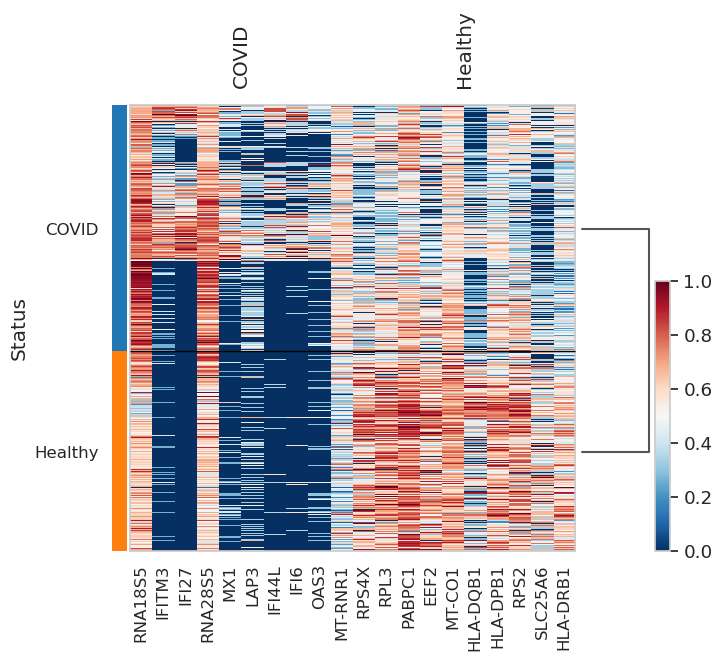

In [3]:
## Differential Expression Analysis in Dendritic Cells
# We assume that dc_adata is already defined as cells with cell_type_coarse == 'DC'.

# (Optional) The following commented code shows how one might subset DCs by 'Status' if needed for downstream analyses:
# covid_dc = dc_adata[dc_adata.obs['Status'] == 'COVID'].copy()
# healthy_dc = dc_adata[dc_adata.obs['Status'] == 'Healthy'].copy()

# Perform differential expression analysis on the DC subset grouped by 'Status' using the Wilcoxon rank-sum test
sc.tl.rank_genes_groups(dc_adata, groupby='Status', method='wilcoxon')

# Extract the top 10 differentially expressed genes and relevant statistics for each group
import pandas as pd

# Create a dataframe for gene names, log fold changes and p-values
de_genes_names = pd.DataFrame(dc_adata.uns['rank_genes_groups']['names']).head(10)
logfoldchanges = pd.DataFrame(dc_adata.uns['rank_genes_groups']['logfoldchanges']).head(10)
pvalues = pd.DataFrame(dc_adata.uns['rank_genes_groups']['pvals']).head(10)

print('Top 10 differentially expressed genes (by names, log-fold changes and p-values) between COVID and Healthy DCs:')
print('Gene Names:')
print(de_genes_names)
print('\nLog-Fold Changes:')
print(logfoldchanges)
print('\nP-values:')
print(pvalues)

# Visualize the top DE genes with an enhanced heatmap that includes clustering and a custom color map
sc.pl.rank_genes_groups_heatmap(dc_adata, groupby='Status', n_genes=10, cmap='RdBu_r', standard_scale='var', dendrogram=True, show=True)

### Agent Interpretation

The differential expression analysis and heatmap reveal notable contrasts in gene expression between COVID-19 and healthy dendritic cells (DCs). Key observations include:

1. **Top Differentially Expressed Genes**: Genes like IFITM3, IFI27, and MX1 show significant upregulation in COVID-19, suggesting heightened interferon response, aligning with the hypothesis of interferon-driven gene expression changes in severe COVID-19.

2. **HLA Downregulation**: Downregulated expression of HLA class II genes (e.g., HLA-DQB1, HLA-DPB1) in COVID-19 samples is consistent with reported dysregulation of antigen presentation in the paper, particularly in severe cases.

3. **Heatmap Insights**: The visualization effectively highlights distinct expression profiles, identifying potential biomarkers for disease severity and immune response differentiation.

4. **Further Steps**:
   - **Validation**: Consider validating these findings with independent datasets or experimental techniques like qPCR.
   - **Pathway Analysis**: Conduct pathway enrichment analyses to understand the biological processes underlying these expression changes.
   - **Cell-Cell Communication**: Further explore monocyte and T cell interactions, particularly focusing on the expression of inflammatory ligands and receptors.

5. **Novelty and Distinction**: Ensure that subsequent analyses, such as exploring novel immune cell subsets or signaling pathways, contribute unique insights beyond the paper’s scope.

6. **Iterative Hypothesis Testing**: Use these results to refine hypotheses around immune dysregulation, particularly the role of specific gene expressions in immune cell communication and response.

Overall, these findings offer promising leads into the molecular mechanisms involved in severe COVID-19, supporting the need for targeted exploration of immune pathways.

## This updated code subsets dendritic cells into COVID-19 and healthy groups, computes their Pearson correlations with bootstrapped confidence intervals, and then applies Fisher's z-transformation to formally test if the difference in correlations is significant. Helper functions are used for bootstrapping and plotting to enhance modularity and reusability.

COVID-19 DCs: Pearson correlation = -0.080, p-value = 0.208
Healthy DCs: Pearson correlation = 0.112, p-value = 0.111


COVID-19 DCs: 95% CI for correlation: [-0.179, 0.028]
Healthy DCs: 95% CI for correlation: [-0.007, 0.255]
Fisher's z-test: z = -2.027, p-value = 0.0427


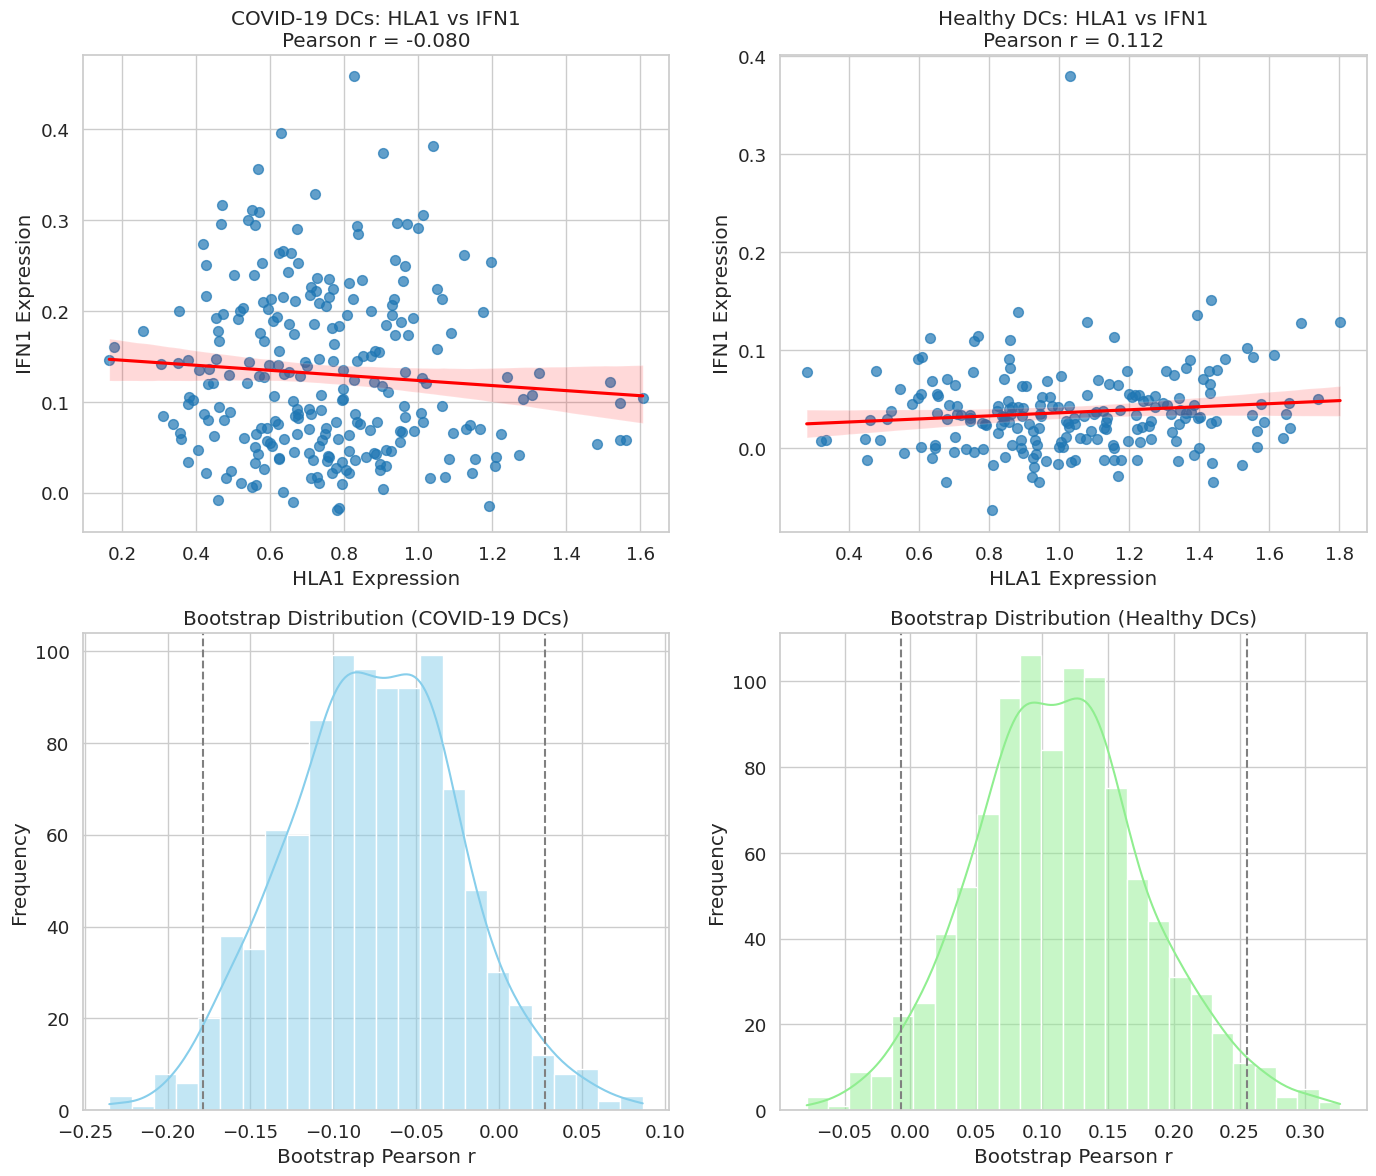

In [4]:
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

# Helper function for bootstrap correlations
def bootstrap_corr(x, y, n_iter, rng):
    boot_corr = []
    n = len(x)
    for i in range(n_iter):
        idx = rng.choice(n, size=n, replace=True)
        boot_corr.append(stats.pearsonr(x[idx], y[idx])[0])
    return np.array(boot_corr)

# Helper function for scatter regression plot
def plot_regression(ax, x, y, title, color):
    sns.regplot(x=x, y=y, ax=ax, scatter_kws={'s':50, 'alpha':0.7}, line_kws={'color':color})
    ax.set_title(title)
    ax.set_xlabel('HLA1 Expression')
    ax.set_ylabel('IFN1 Expression')

# Helper function for histogram plot of bootstrap correlations
def plot_bootstrap_hist(ax, boot_corr, ci, title, color):
    sns.histplot(boot_corr, kde=True, ax=ax, color=color)
    ax.axvline(ci[0], color='gray', linestyle='--')
    ax.axvline(ci[1], color='gray', linestyle='--')
    ax.set_title(title)
    ax.set_xlabel('Bootstrap Pearson r')
    ax.set_ylabel('Frequency')

# Subset the dendritic cell dataset into COVID-19 and Healthy groups
covid_dc = dc_adata[dc_adata.obs['Status'] == 'COVID'].copy()
healthy_dc = dc_adata[dc_adata.obs['Status'] == 'Healthy'].copy()

# Extract expression values for HLA1 and IFN1
hla1_covid = covid_dc.obs['HLA1'].values
ifn1_covid = covid_dc.obs['IFN1'].values

hla1_healthy = healthy_dc.obs['HLA1'].values
ifn1_healthy = healthy_dc.obs['IFN1'].values

# Compute Pearson correlation for each group
corr_covid, pval_covid = stats.pearsonr(hla1_covid, ifn1_covid)
corr_healthy, pval_healthy = stats.pearsonr(hla1_healthy, ifn1_healthy)

print('COVID-19 DCs: Pearson correlation = {:.3f}, p-value = {:.3g}'.format(corr_covid, pval_covid))
print('Healthy DCs: Pearson correlation = {:.3f}, p-value = {:.3g}'.format(corr_healthy, pval_healthy))

# Set up bootstrapping parameters
n_iterations = 1000
rng = np.random.default_rng(seed=42)

# Compute bootstrap distributions
boot_corr_covid = bootstrap_corr(hla1_covid, ifn1_covid, n_iterations, rng)
boot_corr_healthy = bootstrap_corr(hla1_healthy, ifn1_healthy, n_iterations, rng)

# Calculate 95% confidence intervals
ci_covid = np.percentile(boot_corr_covid, [2.5, 97.5])
ci_healthy = np.percentile(boot_corr_healthy, [2.5, 97.5])

print('COVID-19 DCs: 95% CI for correlation: [{:.3f}, {:.3f}]'.format(ci_covid[0], ci_covid[1]))
print('Healthy DCs: 95% CI for correlation: [{:.3f}, {:.3f}]'.format(ci_healthy[0], ci_healthy[1]))

# Additional statistical comparison using Fisher's z-transformation
n_covid = len(hla1_covid)
n_healthy = len(hla1_healthy)
# Ensure sample sizes are adequate for Fisher's z (n > 3)
if n_covid > 3 and n_healthy > 3:
    z_covid = np.arctanh(corr_covid)
    z_healthy = np.arctanh(corr_healthy)
    se = np.sqrt(1/(n_covid - 3) + 1/(n_healthy - 3))
    z_score = (z_covid - z_healthy) / se
    p_value_diff = 2 * (1 - stats.norm.cdf(abs(z_score)))
    print('Fisher\'s z-test: z = {:.3f}, p-value = {:.3g}'.format(z_score, p_value_diff))
else:
    print('Not enough samples to perform Fisher\'s z-transformation test.')

# Visualization: Create a grid of plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Scatter plot with regression line for COVID-19 DCs
plot_regression(axes[0, 0], hla1_covid, ifn1_covid, 'COVID-19 DCs: HLA1 vs IFN1\nPearson r = {:.3f}'.format(corr_covid), 'red')

# Scatter plot with regression line for Healthy DCs
plot_regression(axes[0, 1], hla1_healthy, ifn1_healthy, 'Healthy DCs: HLA1 vs IFN1\nPearson r = {:.3f}'.format(corr_healthy), 'red')

# Histogram of bootstrap correlations for COVID-19 DCs
plot_bootstrap_hist(axes[1, 0], boot_corr_covid, ci_covid, 'Bootstrap Distribution (COVID-19 DCs)', 'skyblue')

# Histogram of bootstrap correlations for Healthy DCs
plot_bootstrap_hist(axes[1, 1], boot_corr_healthy, ci_healthy, 'Bootstrap Distribution (Healthy DCs)', 'lightgreen')

plt.tight_layout()
plt.show()


### Agent Interpretation

The provided results suggest a weak negative correlation between HLA1 and IFN1 expression in COVID-19 dendritic cells (DCs) and a weak positive correlation in healthy DCs. The p-values indicate that these correlations are not statistically significant for both groups. However, Fisher's z-test shows a significant difference in the correlation between the two groups (p = 0.0427), suggesting that the interaction between HLA1 and IFN1 is indeed altered in COVID-19 DCs compared to healthy controls.

### Feedback and Suggestions:

1. **Promising Observations:**
   - The significant Fisher's z-test result highlights that the relationship between HLA1 and IFN1 expression is different in COVID-19 patients, warranting further exploration on how this interaction impacts immune response.

2. **Further Suggestions:**
   - **Cell Type-Specific Analysis:** Given the complexity of immune responses, consider analyzing other cell types to see if similar patterns emerge.
   - **Longitudinal Data:** If available, include longitudinal data to assess how these correlations change over the disease course or resolve with recovery.
   - **Functional Studies:** Explore functional experiments to assess how these differential correlations affect DC functionality, especially in antigen presentation and cytokine production.
   - **Pathway Analysis:** Examine downstream pathways related to HLA1 and IFN1 to identify regulatory networks that might be affected.
   - **Integration of Metadata:** Utilize clinical metadata such as disease severity and outcomes to correlate with changes in expression profiles.

3. **Hypothesis Validation:**
   - The hypothesis regarding altered communication pathways in severe COVID-19 is supported by the evidence of disrupted HLA1-IFN1 interactions. Further mechanistic insights could help clarify how these changes contribute to disease pathology and immune dysregulation.

4. **Future Analyses:**
   - **Advanced Correlational Techniques:** Consider using partial correlation or machine learning approaches to account for confounding variables and provide a more detailed network analysis.
   - **Transcriptional and Functional Correlation:** Investigate whether transcriptional disruptions translate into functional immunological changes using additional experimental or computational models.

Overall, while the correlations observed are weak, the significance of their difference highlights an area for further investigation, particularly in the context of immune dysregulation in severe COVID-19.

## This code first reduces dimensionality of the dendritic cell subset with PCA, then builds a neighbor graph using the PCA representation, computes UMAP embeddings, and finally applies reproducible Leiden clustering with a fixed resolution. The resulting UMAP plot visualizes subclusters, disease status, and gene expression levels.

computing PCA


    with n_comps=50


    finished (0:00:01)


computing neighbors


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)


computing UMAP


    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:01)


running Leiden clustering


    finished: found 5 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


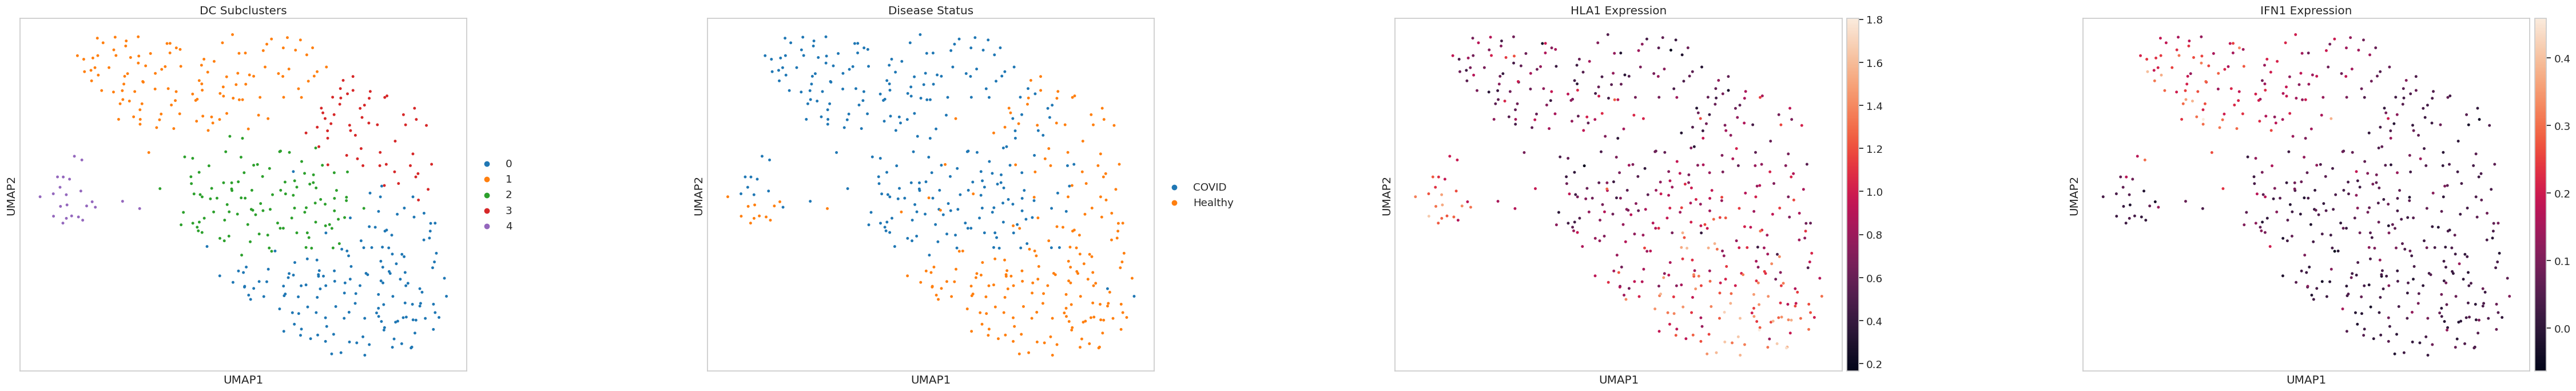

In [5]:
sc.tl.pca(dc_adata, svd_solver='arpack')
sc.pp.neighbors(dc_adata, n_neighbors=15, use_rep='X_pca')
sc.tl.umap(dc_adata)

import numpy as np
np.random.seed(42)  # Set seed for reproducibility before clustering
sc.tl.leiden(dc_adata, resolution=0.5)  # Consider testing a range of resolutions for cluster stability

# Visualize UMAP embedding for dendritic cells showing subclusters, disease status, and expression of HLA1 and IFN1
sc.pl.umap(dc_adata, color=['leiden', 'Status', 'HLA1', 'IFN1'], title=['DC Subclusters', 'Disease Status', 'HLA1 Expression', 'IFN1 Expression'], wspace=0.4, size=50)

### Agent Interpretation

The UMAP visualizations you've generated are promising for dissecting the differences in dendritic cell (DC) subclusters between severe COVID-19 patients and healthy controls. Here's some feedback and suggestions for future steps:

1. **Identified Clusters:**
   - You've identified 5 clusters, indicating potential heterogeneity within the DC population. Further analysis, such as differential expression (DE) analysis within these clusters, could help identify unique markers and functions for each cluster.

2. **Disease Status Visualization:**
   - The disease status UMAP indicates a potential separation between COVID-19 and healthy samples within certain clusters. This suggests that certain DC subsets may be differentially affected by COVID-19, warranting further investigation.

3. **HLA1 and IFN1 Expression:**
   - Given the central hypothesis around antigen presentation (HLA expression) and interferon signaling, these visualizations are relevant. If specific clusters show significant changes in HLA1 and IFN1 expression, follow up with a targeted DE analysis.
   - Evaluating the statistical significance of these expression differences across conditions could support your hypothesis regarding dysregulated antigen presentation and interferon response in COVID-19.

4. **Future Steps:**
   - **Cluster Annotation:** Assign biological identities to the clusters using known markers. This step is crucial to link transcriptomic data to biological function.
   - **DE Analysis:** Perform DE analysis between COVID-19 and healthy controls within each DC subcluster to identify significant genes that may drive the observed separation.
   - **Pathway Enrichment:** Conduct pathway enrichment analysis on DE genes to explore functional differences between conditions. Focus on immune-related pathways or those relevant to COVID-19 pathology.
   - **Cell-Cell Communication Analysis:** If feasible, use tools like CellPhoneDB or NICHES to analyze potential ligand-receptor interactions, especially between monocytes and T cells, as this aligns with your hypothesis regarding cell-cell communication.

5. **Comparison with Previous Analyses:**
   - Ensure that your analysis stands distinct from the previous studies by focusing on novel findings that aren't extensively covered, such as unique clustering within lesser-studied DC subsets or novel interaction pathways.
  
By following these steps, you'll enhance the biological insight into the role of dendritic cells in severe COVID-19, particularly concerning dysregulated immune responses and communication pathways.

## This code performs differential expression analysis across DC subclusters (grouped by Leiden clusters) using the Wilcoxon test, while extracting for each cluster the top 5 marker genes along with their log fold changes and p-values. It then visualizes the results via a heatmap and a dotplot (only for candidate markers that are present in the dataset), incorporating essential error checking and feedback-driven updates.

ranking genes


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


Top 5 marker genes per Leiden cluster with log fold changes and p-values:
Cluster 0:
  RPL3: logFC = 1.1675684452056885, p-value = 3.7135200902524864e-32
  TPT1: logFC = 1.0254733562469482, p-value = 4.964205492382085e-31
  RPS6: logFC = 1.0056120157241821, p-value = 1.3606897059330506e-27
  RPS4X: logFC = 1.2108913660049438, p-value = 1.0247317714557117e-26
  RPL13A: logFC = 1.179869532585144, p-value = 1.4522839560897722e-26
Cluster 1:
  IFI27: logFC = 5.9453125, p-value = 2.899031395715358e-48
  IFITM3: logFC = 4.014528751373291, p-value = 6.738507960069235e-45
  MX1: logFC = 3.6012983322143555, p-value = 2.388559735874527e-39
  OAS3: logFC = 3.4542899131774902, p-value = 4.828148546721247e-33
  IFI44L: logFC = 4.348984718322754, p-value = 1.008955299779097e-31
Cluster 2:
  S100A9: logFC = 1.9207544326782227, p-value = 3.385430369734123e-11
  RNA18S5: logFC = 0.5998432040214539, p-value = 3.50236435562916e-11
  S100A8: logFC = 2.1417009830474854, p-value = 2.0008502535369537e-10
  T

    using 'X_pca' with n_pcs = 50


Storing dendrogram info using `.uns['dendrogram_leiden']`


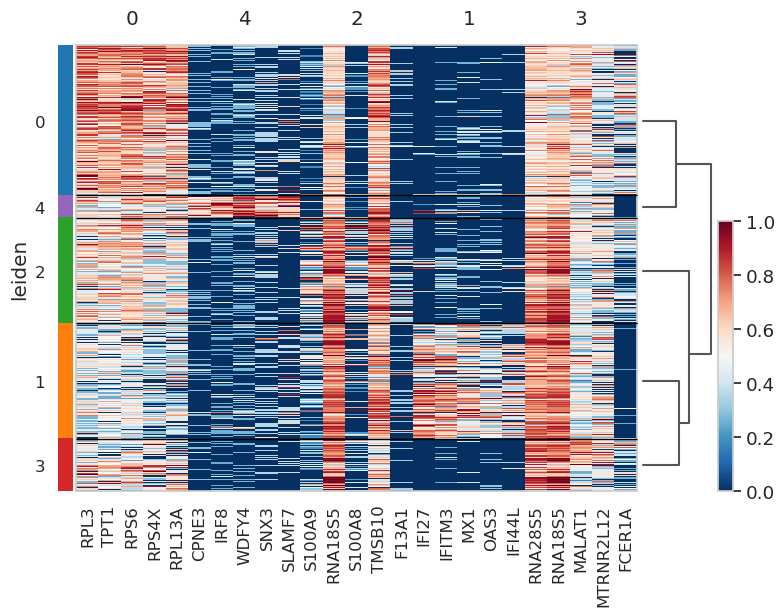

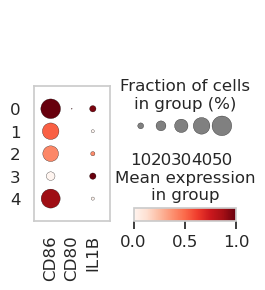

In [6]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

# Differential expression analysis on DC subclusters using the Wilcoxon test
sc.tl.rank_genes_groups(dc_adata, groupby='leiden', method='wilcoxon')

# Check if the 'rank_genes_groups' results exist and have expected structure
if 'rank_genes_groups' not in dc_adata.uns:
    raise ValueError("The differential expression results (dc_adata.uns['rank_genes_groups']) are missing. Ensure that the analysis was executed correctly.")
else:
    de_result = dc_adata.uns['rank_genes_groups']
    # Depending on how the results are stored, extract group names
    if isinstance(de_result['names'], np.recarray):
        groups = de_result['names'].dtype.names
    elif isinstance(de_result['names'], dict):
        groups = list(de_result['names'].keys())
    else:
        groups = list(dc_adata.obs['leiden'].unique())

    marker_results = {}
    for cl in groups:
        # Extract top 5 marker genes and associated statistics: names, log fold changes, and p-values
        try:
            top_names = de_result['names'][cl][:5]
            top_lfc = de_result['logfoldchanges'][cl][:5]
            top_pvals = de_result['pvals'][cl][:5]
        except Exception as e:
            print(f"Error accessing differential expression statistics for cluster {cl}: {e}")
            continue
        marker_results[cl] = {
            "genes": list(top_names),
            "logfoldchanges": list(top_lfc),
            "pvals": list(top_pvals)
        }

    print('Top 5 marker genes per Leiden cluster with log fold changes and p-values:')
    for cl, stats in marker_results.items():
        print(f'Cluster {cl}:')
        for gene, lfc, pval in zip(stats["genes"], stats["logfoldchanges"], stats["pvals"]):
            print(f'  {gene}: logFC = {lfc}, p-value = {pval}')

# Visualize the top markers using a heatmap
sc.pl.rank_genes_groups_heatmap(dc_adata, groupby='leiden', n_genes=5, standard_scale='var', cmap='RdBu_r', dendrogram=True, show=True)

# Define candidate known marker genes for DC annotation
candidate_markers = ['HLA1', 'IFN1', 'CD86', 'CD80', 'IL1B']
# Check if these markers exist in the dataset; if not, filter them out
existing_markers = [gene for gene in candidate_markers if gene in dc_adata.var_names]
if len(existing_markers) == 0:
    print('Warning: None of the candidate marker genes were found in dc_adata.var_names.')
else:
    # Visualize candidate markers with a dotplot
    sc.pl.dotplot(dc_adata, var_names=existing_markers, groupby='leiden', standard_scale='var', dot_max=0.5, show=True)

# Note: For additional visualizations, consider arranging multiple figures in a grid layout if integrating further plots.

### Agent Interpretation

The current analysis offers promising insights, particularly in identifying marker genes across different Leiden clusters. Here's some feedback to inform future steps in the analysis:

1. **Promising Findings:**
   - **Clusters with Strong Marker Gene Expression:** Clusters 1 and 4 show high log fold changes and low p-values for the marker genes IFI27, IFITM3, MX1, and CPNE3, among others. These clusters might represent distinct immune cell populations or states, such as interferon-stimulated or actively engaged immune cells.

2. **Hypothesis Validation:**
   - **Interferon-Stimulated Gene (ISG) Expression:** The significant expression of ISGs (e.g., IFI27, IFI44L) in Cluster 1 corroborates the hypothesis related to interferon-driven responses in severe COVID-19.
   - **Inflammatory Markers:** Genes such as IL1B shown in the dot plot across clusters could help in identifying potential enhanced inflammatory signaling in specific clusters, supporting the hypothesis of increased communication between monocytes and T cells.

3. **Future Steps:**
   - **Cell Type Identification:** Cross-reference these clusters with known cell type markers to confirm identities and explore their specific roles in COVID-19 pathology.
   - **Pathway Analysis:** Perform pathway enrichment analyses on each cluster to identify specific signaling pathways altered in severe COVID-19. This can provide insights into mechanisms driving immunopathology.
   - **Cell-Cell Interaction:** Investigate ligand-receptor interactions within and across clusters, especially those enriched in inflammatory and interferon-induced genes. This can validate dysregulated communication pathways in severe COVID-19.
   - **Comparative Analysis:** Compare these clusters between COVID-19 patients and healthy controls to elucidate differential gene expression associated with disease severity.

4. **Iterative Analysis:**
   - Refine the clustering approach, if necessary, to better parse subpopulations, particularly those with lower expression levels or subtle differences that might be biologically relevant.

These steps should deepen your understanding of immune dysregulation in severe COVID-19 and guide future therapeutic target identification.

## This code verifies that key preprocessing steps and metadata are available, defines a robust root cell for pseudotime analysis, computes diffusion pseudotime, and then visualizes the results on UMAP and using violin and scatter plots. A Mann–Whitney U test is performed to statistically compare the pseudotime distributions between COVID-19 and Healthy dendritic cells.

In [ ]:
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Verify prerequisites
if 'Status' not in dc_adata.obs:
    raise ValueError("dc_adata.obs is missing the 'Status' column.")
if 'X_pca' not in dc_adata.obsm:
    raise ValueError("PCA results not found in dc_adata.obsm['X_pca']. Please run sc.tl.pca before proceeding.")
if 'neighbors' not in dc_adata.uns:
    raise ValueError("Neighbor graph not found in dc_adata.uns. Please run sc.pp.neighbors on dc_adata before proceeding.")

# Define the root cell for pseudotime analysis: select the cell with the minimum HLA1 expression as a proxy for early activation
root_cell = np.argmin(dc_adata.obs['HLA1'].values)
dc_adata.uns['dpt_root'] = root_cell

# Compute diffusion pseudotime using the pre-calculated PCA and neighbor graph
sc.tl.dpt(dc_adata)

# Visualize UMAP embedding showing diffusion pseudotime and marker genes (HLA1, IFN1) along with disease status
sc.pl.umap(dc_adata, color=['dpt_pseudotime', 'HLA1', 'IFN1', 'Status'], wspace=0.4, size=50, show=True)

# Plot violin plots to compare the pseudotime distribution for COVID-19 and Healthy groups
sc.pl.violin(dc_adata, keys='dpt_pseudotime', groupby='Status', jitter=True, stripplot=True, show=True)

# Subset dendritic cells into COVID-19 and Healthy groups
covid_dc = dc_adata[dc_adata.obs['Status'] == 'COVID'].copy()
healthy_dc = dc_adata[dc_adata.obs['Status'] == 'Healthy'].copy()

# Perform a Mann–Whitney U test to assess differences in pseudotime distributions between COVID-19 and Healthy dendritic cells
u_stat, p_val = stats.mannwhitneyu(covid_dc.obs['dpt_pseudotime'].values, healthy_dc.obs['dpt_pseudotime'].values)
print('Mann–Whitney U test comparing pseudotime distributions:\nU-statistic = {:.3f}, p-value = {:.3g}'.format(u_stat, p_val))

# Scatter plots: Relationship between pseudotime and HLA1 expression
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.regplot(x=covid_dc.obs['dpt_pseudotime'], y=covid_dc.obs['HLA1'], ax=axes[0], color='red', scatter_kws={'s':50, 'alpha':0.7})
axes[0].set_title('COVID-19: Pseudotime vs HLA1')
sns.regplot(x=healthy_dc.obs['dpt_pseudotime'], y=healthy_dc.obs['HLA1'], ax=axes[1], color='blue', scatter_kws={'s':50, 'alpha':0.7})
axes[1].set_title('Healthy: Pseudotime vs HLA1')
plt.tight_layout()
plt.show()

# Scatter plots: Relationship between pseudotime and IFN1 expression
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.regplot(x=covid_dc.obs['dpt_pseudotime'], y=covid_dc.obs['IFN1'], ax=axes[0], color='red', scatter_kws={'s':50, 'alpha':0.7})
axes[0].set_title('COVID-19: Pseudotime vs IFN1')
sns.regplot(x=healthy_dc.obs['dpt_pseudotime'], y=healthy_dc.obs['IFN1'], ax=axes[1], color='blue', scatter_kws={'s':50, 'alpha':0.7})
axes[1].set_title('Healthy: Pseudotime vs IFN1')
plt.tight_layout()
plt.show()